In [15]:
import warnings; warnings.filterwarnings('ignore')

# Load packages
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
#import time
from subprocess import check_output

In [37]:
data = pd.read_csv('default of credit card clients.csv')

In [38]:
data.head()  # head method show only first 5 rows

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_sep,PAY_aug,PAY_jul,PAY_jun,...,BILL_april,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_april,default_payment_next_month,bill,paid
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,7704,689
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,17077,5000
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,101653,11018
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,231334,8388
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,109339,59049


In [39]:
# Feature names as a list
col = data.columns # .columns gives columns names in data 
print(col)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_sep',
       'PAY_aug', 'PAY_jul', 'PAY_jun', 'PAY_may', 'PAY_april', 'BILL_sep',
       'BILL_aug', 'BILL_jul', 'BILL_jun', 'BILL_may', 'BILL_april',
       'paid_sep', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may',
       'paid_april', 'default_payment_next_month', 'bill', 'paid'],
      dtype='object')


In [40]:
# y includes our labels and x includes our features
y = data.default_payment_next_month # 0 or 1
list = ['ID','default_payment_next_month', 'SEX', 'AGE', 'MARRIAGE','EDUCATION']
x = data.drop(list,axis = 1 )
x.head()


,LIMIT_BAL,PAY_sep,PAY_aug,PAY_jul,PAY_jun,PAY_may,PAY_april,BILL_sep,BILL_aug,BILL_jul,...,BILL_may,BILL_april,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_april,bill,paid
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,0,0,0,689,0,0,0,0,7704,689
1,120000,-1,2,0,0,0,2,2682,1725,2682,...,3455,3261,0,1000,1000,1000,0,2000,17077,5000
2,90000,0,0,0,0,0,0,29239,14027,13559,...,14948,15549,1518,1500,1000,1000,1000,5000,101653,11018
3,50000,0,0,0,0,0,0,46990,48233,49291,...,28959,29547,2000,2019,1200,1100,1069,1000,231334,8388
4,50000,-1,0,-1,0,0,0,8617,5670,35835,...,19146,19131,2000,36681,10000,9000,689,679,109339,59049


Number of not default:  23364
Number of default :  6636


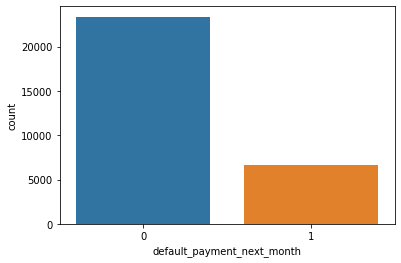

In [20]:
ax = sns.countplot(y,label="Count") # not default = 23364, default = 6636
zero, one = y.value_counts()
print('Number of not default: ',zero)
print('Number of default : ',one)

In [21]:
x.describe()

,LIMIT_BAL,PAY_sep,PAY_aug,PAY_jul,PAY_jun,PAY_may,PAY_april,BILL_sep,BILL_aug,BILL_jul,...,BILL_may,BILL_april,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_april,bill,paid
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,...,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04
mean,167484.322667,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,...,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,2.698617e+05,3.165139e+04
std,129747.661567,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,...,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,3.795643e+05,6.082768e+04
min,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,...,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,-3.362590e+05,0.000000e+00
25%,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,...,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,2.868800e+04,6.679750e+03
50%,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,...,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,1.263110e+05,1.438300e+04
75%,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,...,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,3.426265e+05,3.350350e+04
max,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,...,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,5.263883e+06,3.764066e+06


# Visualization: Univariate & Pair-Wise Plots, Correlation Map 
In order to visualizate data we are going to use seaborn plots. 
Before violin and swarm plot we need to normalize/standirdize data for ease of visualization (ranges are too different for original variables).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

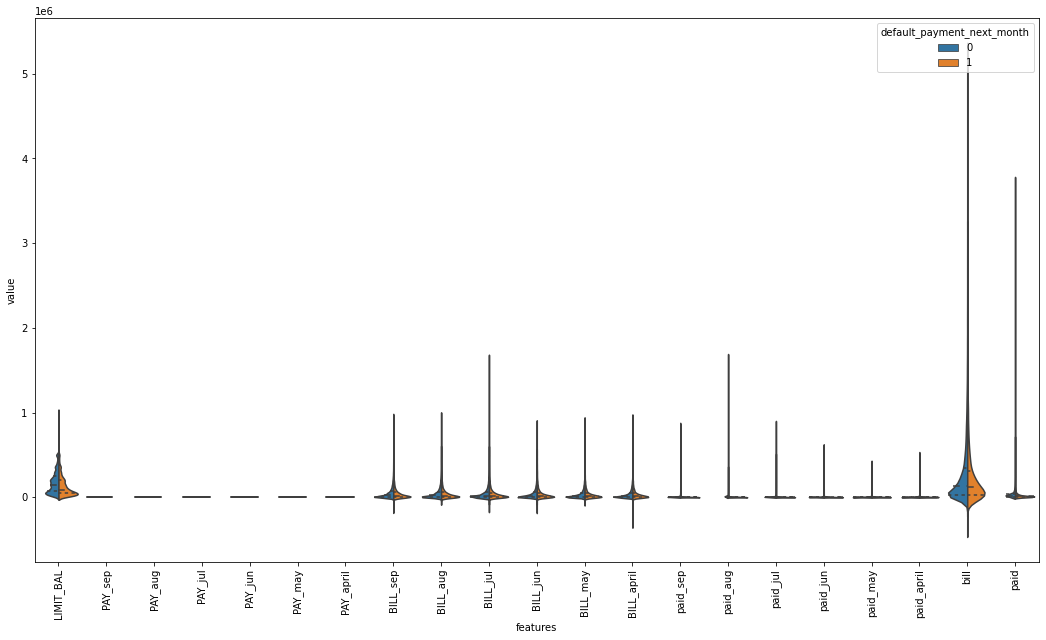

In [22]:
# Violin plot
data_dia = y
data = x
#data_n_2 = (data - data.mean()) / (data.std()) # standardization
data = pd.concat([y,data.iloc[:,0:24]],axis=1) # first 10 features
data = pd.melt(data,id_vars="default_payment_next_month",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(18,10))
sns.violinplot(x="features", y="value", hue="default_payment_next_month", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

# comment

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

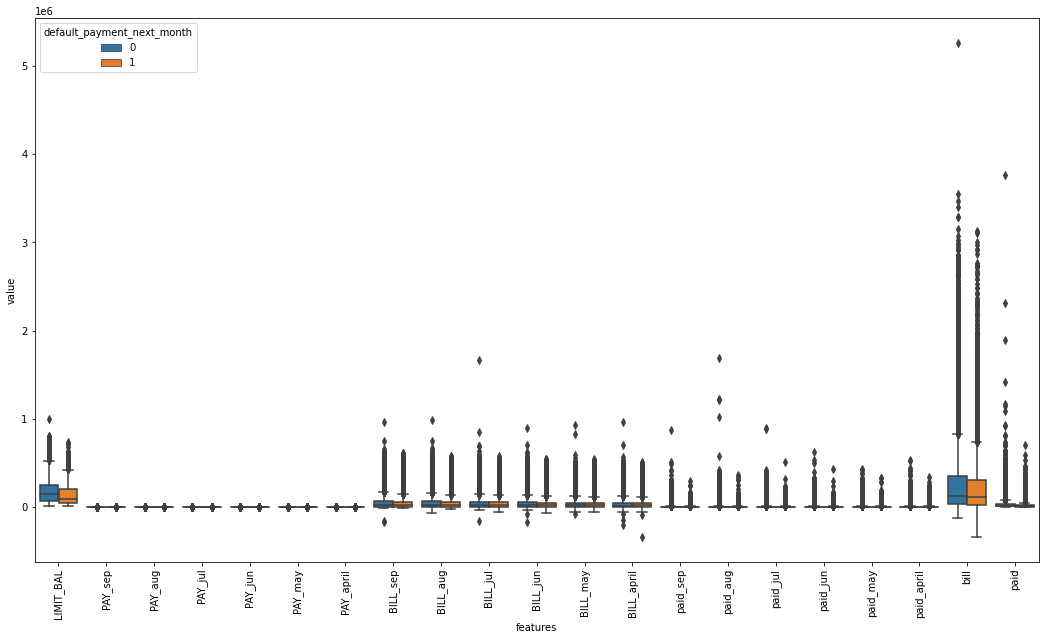

In [23]:
# As an alternative of violin plot, box plot can be used
plt.figure(figsize=(18,10))
sns.boxplot(x="features", y="value", hue="default_payment_next_month", data=data)
plt.xticks(rotation=90)

# add comment

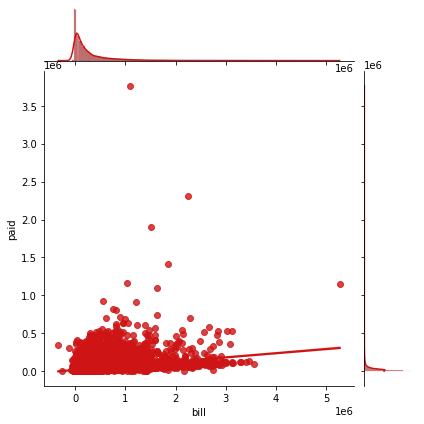

In [24]:
sns.jointplot(x.loc[:,'bill'], x.loc[:,'paid'], kind="reg", color="#ce1414")

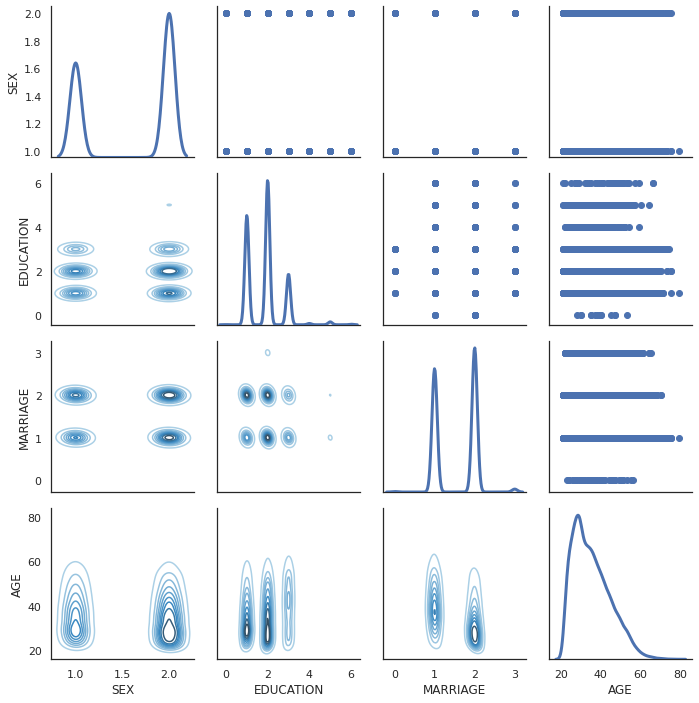

In [ ]:
sns.set(style="white")
df = x.loc[:,['SEX','EDUCATION','MARRIAGE', 'AGE']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

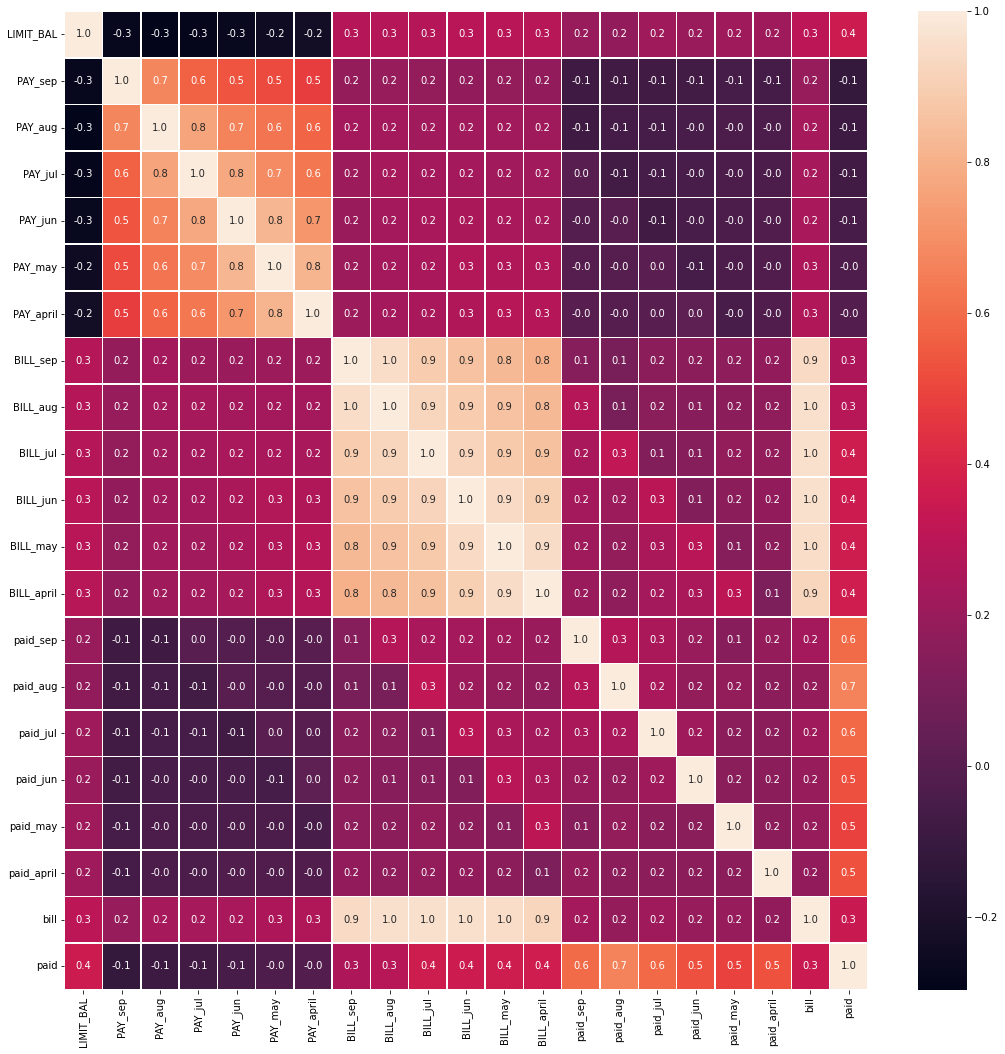

In [25]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [26]:
! pip install umap-learn

In [41]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
# PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(x)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df['pca-one'] = pca_result[:,0]; df['pca-two'] = pca_result[:,1]

# UMAP 
# umap_results = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(x)
umap_results = umap.UMAP(random_state=999, n_neighbors=30, min_dist=.25).fit_transform(x)
df['umap-one'] = umap_results[:,0]; df['umap-two'] = umap_results[:,1]

# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)
df['tsne-2d-one'] = tsne_results[:,0]; df['tsne-2d-two'] = tsne_results[:,1]

# Plot Visualizations
plt.figure(figsize=(18,8))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(x="pca-one", y="pca-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax1)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x="umap-one", y="umap-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax3)

Explained variation per principal component: [0.88245458 0.08023022 0.01841592 0.00667255]


NameError: ignored

# feature selection

In [28]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Note: the max_iter=100 that you defined on the initializer is not in the grid. 
# So, that number will be constant, while the ones in the grid will be searched.

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Note: the parameter n_jobs is to define how many CPU cores from your computer to use 
# (-1 is for all the cores available). The cv is the number of splits for cross-validation.

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05, 0.1],
                         'hidden_layer_sizes': [(8, 4), (24, 12), (48, 24),
                                                (96, 48)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [29]:

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.777 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'solver': 'sgd'}
0.776 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'solver': 'adam'}
0.777 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.777 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.777 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'sgd'}
0.777 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'adam'}
0.777 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.777 (+/-0.000) for {'activatio

In [30]:
#best parameter?
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [42]:
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Confusion Matrix:
 [[5873    0]
 [1627    0]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5873
           1       0.00      0.00      0.00      1627

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.69      7500



In [ ]:
! pip install sklearn

In [43]:
y = data.default_payment_next_month # 0 or 1
list = ['ID','default_payment_next_month', 'PAY_sep', 'PAY_aug', 'PAY_jul',
        'PAY_jun', 'PAY_may', 'PAY_april']
x = data.drop(list,axis = 1 )
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_sep,BILL_aug,BILL_jul,BILL_jun,BILL_may,BILL_april,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_april,bill,paid
0,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,7704,689
1,120000,2,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,17077,5000
2,90000,2,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,101653,11018
3,50000,2,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,231334,8388
4,50000,1,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,109339,59049


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# ---------------------------------------------------------------------------
# We should be selecting features using TRAINING Dataset and NOT FULL Dataset - Fix This
# ---------------------------------------------------------------------------

# Get ready to plot scores from Univariate Feature Selection Methods
plt.figure(figsize=(18,10)); plt.clf()
x_indices = np.arange(x.shape[-1])

# SelectKBest Features using F-Test
x_new_f = SelectKBest(f_classif, k=6)
x_new_f.fit_transform(x, y)
#scores = x_new_f.pvalues_
#scores = -np.log10(x_new_f.pvalues_)
scores = x_new_f.scores_
scores /= scores.max()
plt.bar(x_indices - .45, scores, width=.15,
        label='F-Test score', color='darkorange',
        edgecolor='black')

# Print Selected Features
print('F-Test Feature Scores List: \n', x_new_f.scores_)
print('Feature List: \n', x.columns, '\n')

# SelectKBest Features using Chi-Square Test
x_new_chi2 = SelectKBest(chi2, k=6)
x_new_chi2.fit_transform(x, y)
#scores = x_new_chi2.pvalues_
#scores = -np.log10(x_new_chi2.pvalues_)
scores = x_new_chi2.scores_
scores /= scores.max()
plt.bar(x_indices - .25, scores, width=.15,
        label='Chi-Square score', color='navy',
        edgecolor='black')

# Print Selected Features
print('Chi-Square Test Feature Scores List: \n', x_new_chi2.scores_)
print('Feature List: \n', x.columns, '\n')

# SelectKBest Features using Mutual Information
x_new_mi = SelectKBest(mutual_info_classif, k=6)
x_new_mi.fit_transform(x, y)
scores = x_new_mi.scores_
scores /= scores.max()
plt.bar(x_indices - .05, scores, width=.15,
        label='Mutual Information score', color='c',
        edgecolor='black')

# Print Selected Features
print('Mutual Information Feature Scores List: \n', x_new_mi.scores_)
print('Feature List: \n', x.columns, '\n')

# Finish Plotting
plt.title("Comparing Univariate Feature Selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

# Re-Run to Get Datasets
x_new_f = SelectKBest(f_classif, k=6).fit_transform(x, y)
x_new_chi2 = SelectKBest(chi2, k=6).fit_transform(x, y)
x_new_mi = SelectKBest(mutual_info_classif, k=6).fit_transform(x, y)

In [ ]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_new_f, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_,'\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

In [ ]:
# chi-squared test
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_new_chi2, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_,'\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

In [45]:
# mutual information
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_new_mi, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_, '\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

NameError: ignored

In [46]:
# Recursive Feature Elimination with Cross-Validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Split data into training and testing
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Specify Classifier:
# Best MLP Parameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'}
# clf = MLPClassifier(activation='tanh', solver='adam', alpha=0.1, hidden_layer_sizes=(96,48), random_state=1)
clf = RandomForestClassifier() 

# "Accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2), scoring='accuracy') #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal Number of Features :', rfecv.n_features_, '\n')
print('Best Features :', x_train.columns[rfecv.support_], '\n')

Optimal Number of Features : 19 

Best Features : Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_sep',
       'BILL_aug', 'BILL_jul', 'BILL_jun', 'BILL_may', 'BILL_april',
       'paid_sep', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may',
       'paid_april', 'bill', 'paid'],
      dtype='object') 



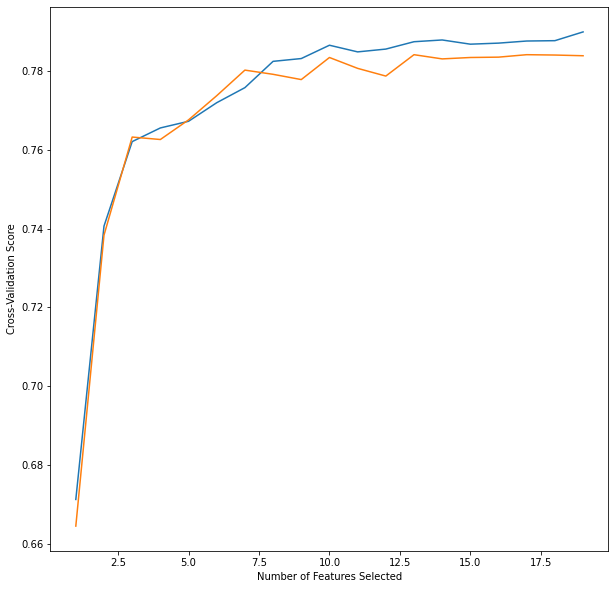

In [47]:
# ploting accuracy
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [48]:
# Now you can use the rfecv to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , rfecv.predict(x_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Confusion Matrix:
 [[5559  314]
 [1276  351]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      5873
           1       0.53      0.22      0.31      1627

    accuracy                           0.79      7500
   macro avg       0.67      0.58      0.59      7500
weighted avg       0.75      0.79      0.75      7500

